# Advertising Sales Channel Prediction

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Load Dataset.

In [6]:
AdDF = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')

In [7]:
AdDF.shape

(200, 5)

In [8]:
AdDF

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [9]:
AdDF.drop(columns = 'Unnamed: 0',inplace = True) #dropping the unnecessary 'Unnamed 0' column.

In [10]:
AdDF

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


#### Getting the basic summary and statistical information of the data.

In [11]:
AdDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [12]:
AdDF.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Dataframe Description:

The distribution strategy and the channel design have to be right the first time, when a company enters a market.

An effective distribution strategy under efficient supply-chain management, as well as market know-how and customer knowledge and understanding open doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored .

The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. They predict the total sales generated from all the sales channel.
Features: Contain data about amount of money spent on advertising on media/ channels

Tv 

Radio

Newspaper

Target variable/Label: is about the total sales made as a response to the combinations of amounts spend on advertising on 
media/ channels

Sales

#### Checking for null / values missing

In [13]:
AdDF.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

#### There are no values missing from dataset

#### Checking for 0 values in dataset

In [14]:
(AdDF==0).sum()

TV           0
radio        1
newspaper    0
sales        0
dtype: int64

'radio' has a '0' value.

### Interpreting Relationship between Dependent and Independent Variables

#### Visualizing Target Variable

<AxesSubplot:xlabel='sales', ylabel='Density'>

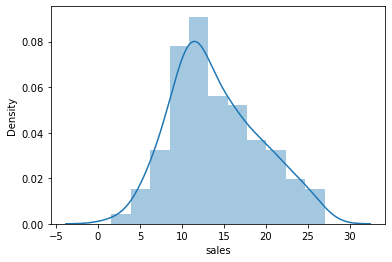

In [15]:
sns.distplot(AdDF['sales'])

In [16]:
AdDF['sales'].skew()

0.4075714250767127

Label Data is fairly normally distributed

In [17]:
X = AdDF.drop(columns = ['sales'])
y = AdDF['sales']

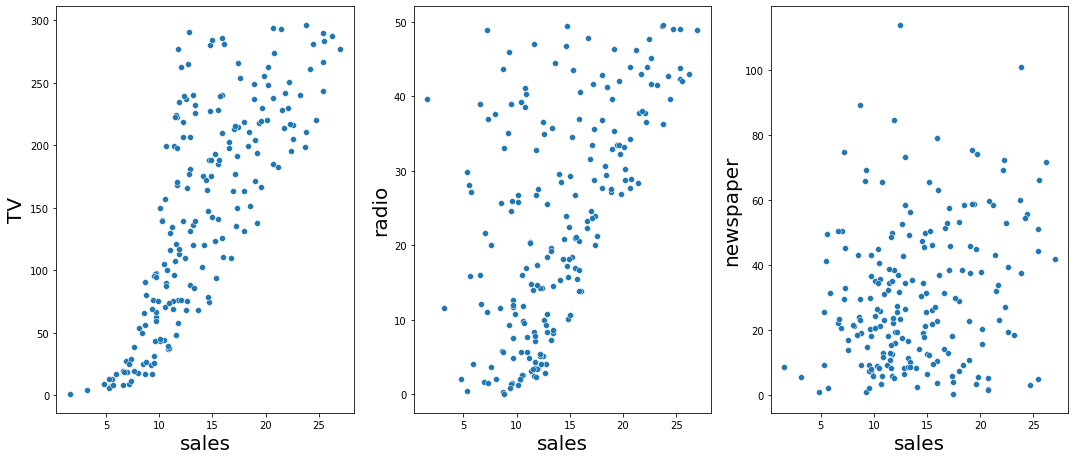

In [18]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1

for col in X:
    if plotnum<=8:
        plt.subplot(4,4,plotnum)
        sns.scatterplot(y,X[col])
        plt.xlabel('sales',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

It is observed that there is a positive linear relationship between 'TV' and 'sales' and 'radio' and 'sales'

<Figure size 1440x1800 with 0 Axes>

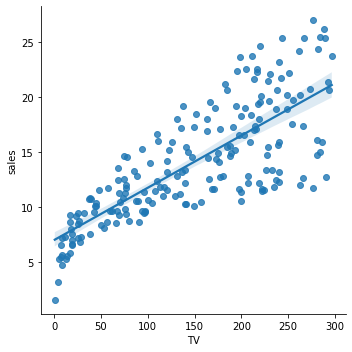

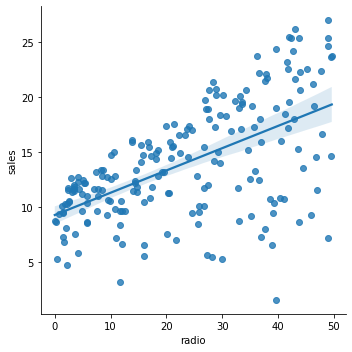

In [19]:
plt.figure(figsize=(20,25),facecolor='white')

sns.lmplot(x = 'TV', y ='sales',data = AdDF)
sns.lmplot(x = 'radio', y ='sales',data = AdDF)
plt.tight_layout()

### Finding Correlation 

In [20]:
a_corr = AdDF.corr()
a_corr

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


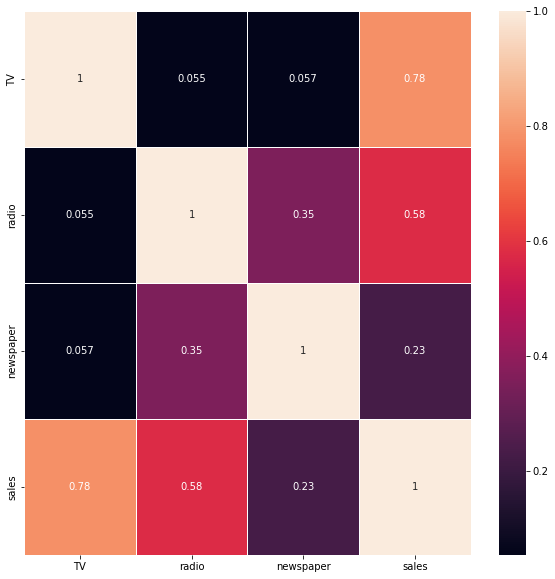

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(a_corr,annot=True,linewidth=1)
plt.show()

'sales' has the highest correlation with 'TV' followed by 'radio' and a bit weak correlation with 'newspaper'.

### Visualizing correlation of feature columns with label column.

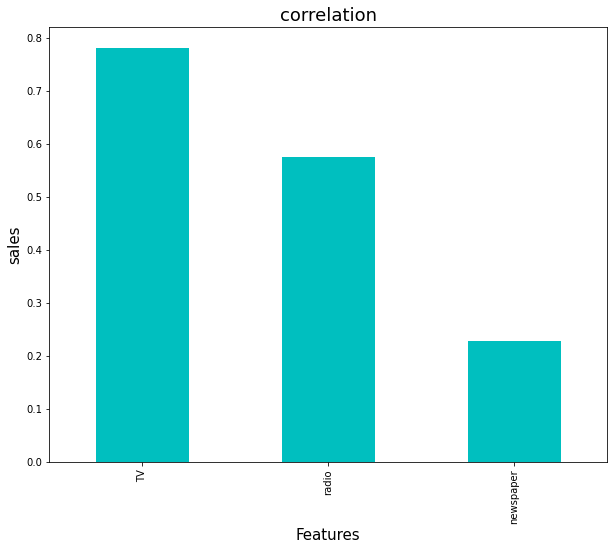

In [22]:
plt.figure(figsize = (10,8))
AdDF.corr()['sales'].sort_values(ascending = False).drop(['sales']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('sales',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

'sales' has the highest correlation with 'TV' and the weakest correlation with 'newspaper'.

### Checking for Skewness and presence of Outliers in Feature Data

In [23]:
AdDF.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

Data distribution in 'newspaper' is skewed

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

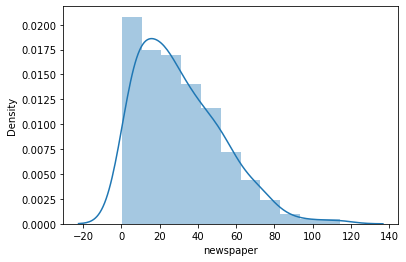

In [24]:
sns.distplot(AdDF['newspaper'])

Data distribution in 'newspaper' is right skewed

### Checking for Outliers

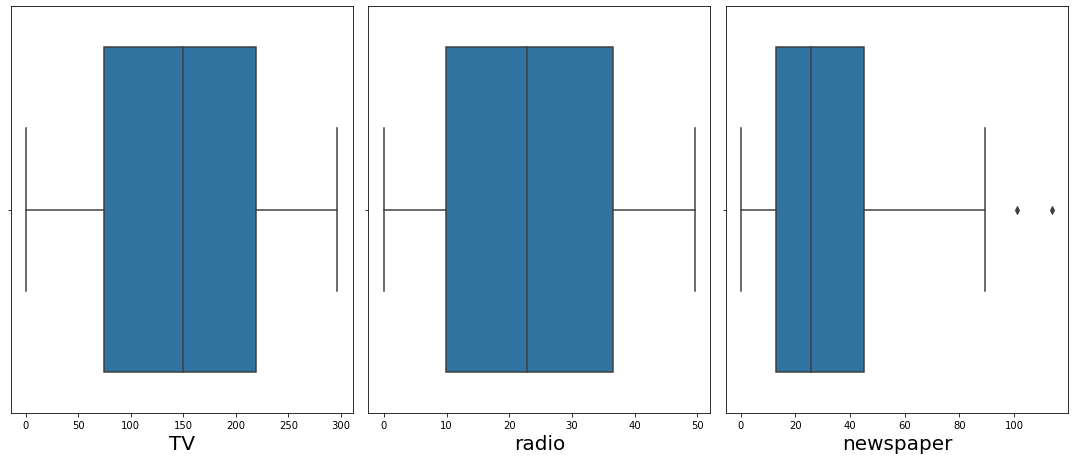

In [25]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1

for col in X:
    if plotnum<=8:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=20)
        
    plotnum+=1
plt.tight_layout()

'newspaper' column has some outlier present.

### Removing The Outliers

#### Using IQR Method

In [26]:
df = AdDF.copy()


In [27]:
indxdrop = np.array([])

q1 = df['newspaper'].quantile(0.25)
q3 = df['newspaper'].quantile(0.75)
iqr = q3-q1
upperval = q3 + (1.5*iqr)
lowerval = q1 - (1.5*iqr)
col =  df['newspaper']
indx = col[(col > upperval) | (col < lowerval)].index
indxdrop = np.append(indxdrop, indx)
# find all the indices of outliers in the columns using IQR and append them to indxdrop array 

In [28]:
indxdrop

array([ 16., 101.])

In [29]:
df = df.drop(indx)

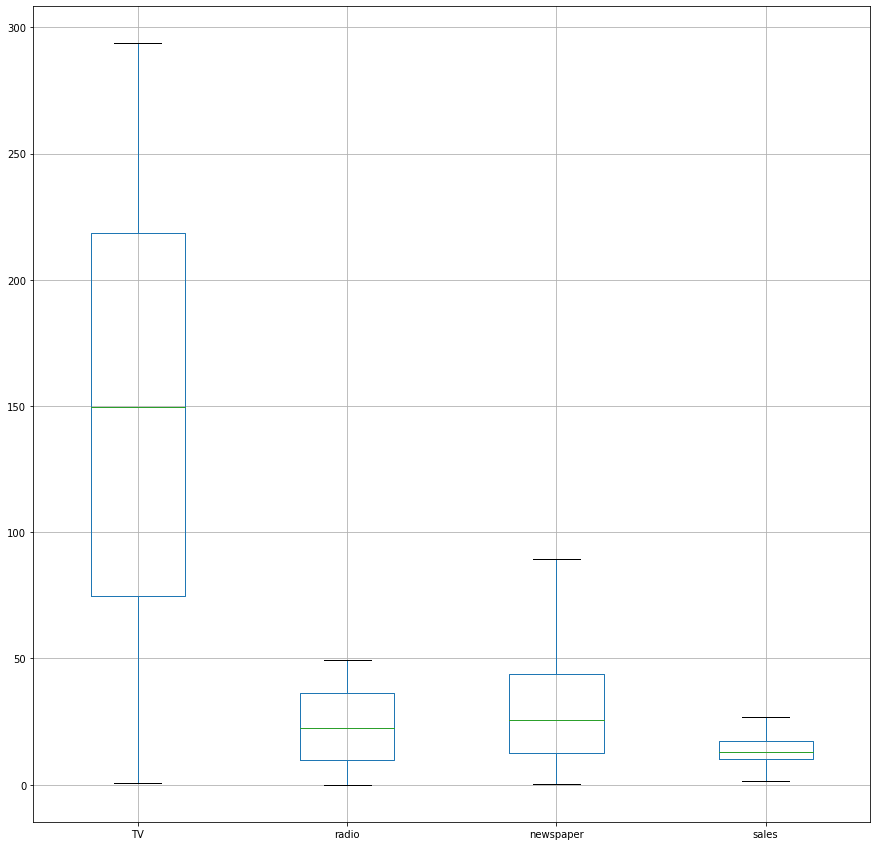

In [30]:
df.boxplot(figsize=[15,15])

plt.show()

In [31]:
df.shape

(198, 4)

In [32]:
AdDF.shape

(200, 4)

##### Data loss %:

In [33]:
loss=(200-198)/200 * 100
loss

1.0

1% data loss is acceptable.

#### Using Z score

In [34]:
df2 = AdDF.copy()

In [35]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3).all(axis=1)] #taking 3 as threshold value

In [36]:
df3.shape

(198, 4)

##### Data loss %:

In [37]:
loss=(200-198)/200 * 100
loss

1.0

1% data loss is acceptable.

In [38]:
AdDF = df.copy()

In [39]:
AdDF.shape

(198, 4)

In [40]:
AdDF.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

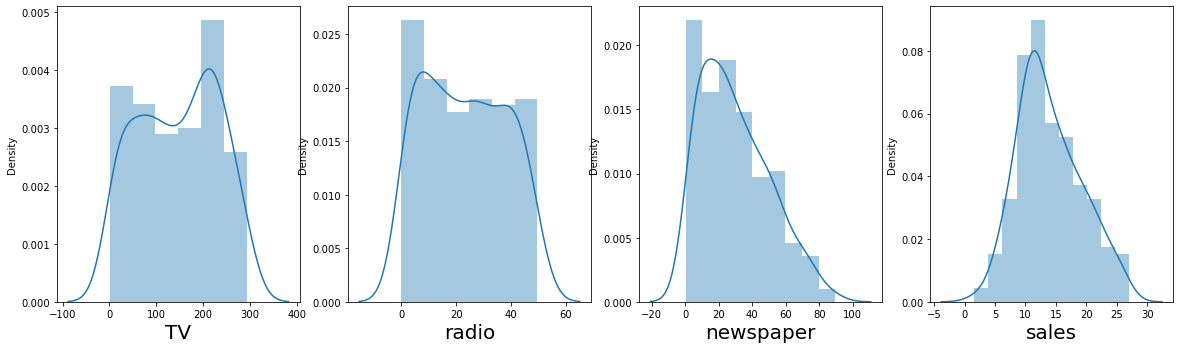

In [41]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in AdDF:
    if plotnum<=10:
        plt.subplot(4,4,plotnum)
        sns.distplot(AdDF[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Outlier removal has reduced the Skewness to some extent.

#### Reducing skewness further

### Normalizing Data Distribution


Replacing 0 values in dataset with their respective column median using Simple Imputer

In [42]:
from sklearn.impute import SimpleImputer

In [43]:
(AdDF == 0).sum()

TV           0
radio        1
newspaper    0
sales        0
dtype: int64

'radio' has one 0 value.

In [44]:
si = SimpleImputer(missing_values = 0,strategy = 'most_frequent',verbose = 0 ) 

Imputing the 0 value with most frequently occuring value in the 'newspaper' column.

In [45]:
feat = ['radio']

In [46]:
Si = si.fit(AdDF[feat])

In [47]:
AdDF[feat] = Si.transform(AdDF[feat])

In [48]:
(AdDF == 0).sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

#### Normalizing Data Distribution using PowerTransformer

In [49]:
from sklearn.preprocessing import PowerTransformer

In [50]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [51]:
skew = ['newspaper']

In [52]:
df4 = AdDF[skew]

In [53]:
df4

,newspaper
0,69.2
1,45.1
2,69.3
3,58.5
4,58.4
...,...
195,13.8
196,8.1
197,6.4
198,66.2


In [54]:
transformed= powtrans.fit_transform(df4)

In [55]:
type(transformed)

numpy.ndarray

In [56]:
transformed = pd.DataFrame(transformed, columns=df4.columns) #to convert numpy array back into dataframe


In [57]:
transformed.isnull().sum()

newspaper    0
dtype: int64

In [58]:
transformed.skew()

newspaper   -0.101288
dtype: float64

In [59]:
transformed.index = AdDF.index

In [60]:
AdDF[skew] = transformed[skew]

In [61]:
AdDF.skew()

TV          -0.082332
radio        0.119916
newspaper   -0.101288
sales        0.407130
dtype: float64

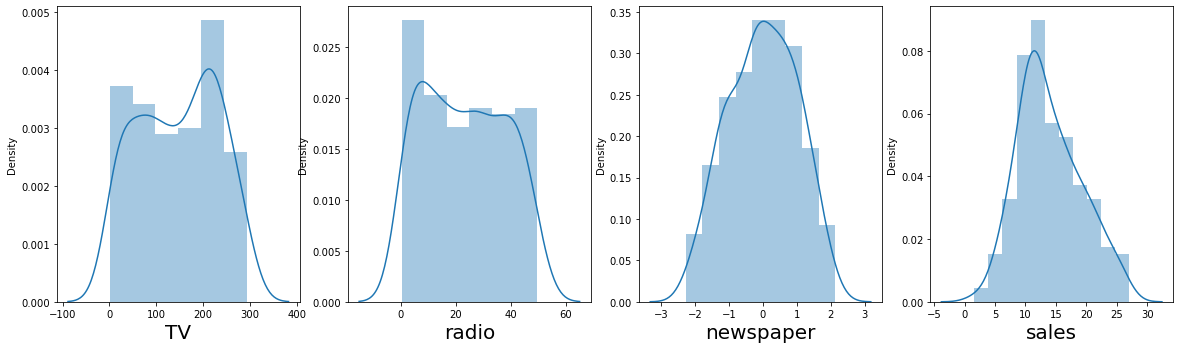

In [62]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in AdDF:
    if plotnum<=10:
        plt.subplot(4,4,plotnum)
        sns.distplot(AdDF[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

#### Distributions look much more Normalised now

In [63]:
X = AdDF.drop(columns = 'sales')
y = AdDF['sales']

### This is a Regression Problem since the target variable / Label column ('sales') has continuous type of Data.

### Feature Selection

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)

In [66]:
scaled_X

array([[ 0.97869734,  0.99009409,  1.6041965 ],
       [-1.19901165,  1.09147939,  0.83104401],
       [-1.51933199,  1.53757474,  1.60705249],
       [ 0.05645636,  1.2266598 ,  1.28376774],
       [ 0.40024339, -0.83484143,  1.28062154],
       [-1.61906543,  1.74034535,  1.76610727],
       [-1.04647815,  0.65214306, -0.10205346],
       [-0.31079737, -0.24004764, -0.84968895],
       [-1.62023876, -1.42287621, -2.09866461],
       [ 0.62317696, -1.38908111, -0.22649933],
       [-0.94557138, -1.17279246, -0.06553382],
       [ 0.79800381,  0.05734926, -1.59608414],
       [-1.44189191,  0.80760053,  1.50859232],
       [-0.57714432, -1.05113009, -1.23269654],
       [ 0.67363035,  0.65890208,  0.86367455],
       [ 0.57155024,  1.65923711,  1.1026083 ],
       [ 1.58061798,  1.11175645,  1.19771741],
       [-0.90919801, -0.17921645, -0.39458775],
       [ 0.0071763 ,  0.05059024, -0.346834  ],
       [ 0.84141719,  0.30743302,  1.11921444],
       [ 1.06435076, -1.2201056 , -0.102

### Checking for Multicollinearity using Variance Inflation Factor

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
vif = pd.DataFrame()

In [69]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]

In [70]:
vif

,Features,vif
0,TV,1.003201
1,radio,1.097709
2,newspaper,1.096463


There is no multicollinearity.

### Selecting Kbest Features

In [71]:
from sklearn.feature_selection import SelectKBest, f_classif

In [72]:
bestfeat = SelectKBest(score_func = f_classif, k = 3)
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [73]:
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(10,'Score'))

     Feature     Score
0         TV  3.672431
1      radio  1.733126
2  newspaper  1.259850


Retaining all features

## Regression Model Building

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
x_train,x_test,y_train,y_test = train_test_split(scaled_X,y,test_size = .31, random_state = 1)

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error

In [77]:
lr = LinearRegression()
rf = RandomForestRegressor()
xg = XGBRegressor()
SV= SVR()
r=Ridge()
l = Lasso()

### Training the Models

In [78]:
lr.fit(x_train,y_train)
rf.fit(x_train,y_train)
xg.fit(x_train,y_train)
SV.fit(x_train,y_train)
r.fit(x_train,y_train)
l.fit(x_train,y_train)

Lasso()

All models have been trained.

### Linear Regression Model

In [79]:
y_lr_pred = lr.predict(x_test)

####  R2 Score

In [80]:
r2_score(y_test,y_lr_pred)

0.9102155770997384

#### Mean Squared Error 

In [81]:
mean_squared_error(y_test,y_lr_pred)

2.6204298548555984

### Ridge Regression Model

In [82]:
y_r_pred = r.predict(x_test)

####  R2 Score

In [83]:
r2_score(y_test,y_r_pred)

0.9109459519350958

#### Mean Squared Error 

In [84]:
mean_squared_error(y_test,y_r_pred)

2.5991132838738875

### Lasso Regression Model

In [85]:
y_l_pred = l.predict(x_test)

###  R2 Score

In [86]:
r2_score(y_test,y_l_pred)

0.8355268339115316

#### Mean Squared Error 

In [87]:
mean_squared_error(y_test,y_l_pred)

4.800280280462664

###  Random Forest Regression Model

In [88]:
y_rf_pred = rf.predict(x_test)

#### R2 Score

In [89]:
r2_score(y_test,y_rf_pred)

0.97902418623017

#### Mean Squared Error

In [90]:
mean_squared_error(y_test,y_rf_pred)

0.6121958225806426

### XGB Regression Model 

In [91]:
y_xg_pred = xg.predict(x_test)

####  R2 Score

In [92]:
r2_score(y_test,y_xg_pred)

0.9691237997977404

### Support Vector Regression Model

In [93]:
y_svr_pred = SV.predict(x_test)


####  R2 Score

In [94]:
r2_score(y_test,y_svr_pred)

0.8892722133834817

#### Mean Squared Error

In [95]:
mean_squared_error(y_test,y_svr_pred)

3.2316785967909754

### Model Cross Validation

In [96]:
from sklearn.model_selection import ShuffleSplit,cross_val_score

#### Linear Regression

In [97]:
cross_val_score(lr,scaled_X,y,cv=5).mean()

0.8862147505839119

#### Ridge Regression

In [98]:
cross_val_score(r,scaled_X,y,cv=5).mean()

0.8863030144676898

#### Lasso Regression Model

In [99]:
cross_val_score(l,scaled_X,y,cv=5).mean()

0.8168183052726793

#### Random Forest Regression

In [100]:
cross_val_score(rf,scaled_X,y,cv=5).mean()

0.976660717234864

#### XGB Regression

In [101]:
cross_val_score(xg,scaled_X,y,cv=5).mean()

0.9680093602530573

#### SV Regression

In [102]:
cross_val_score(SV,scaled_X,y,cv=5).mean()

0.90339584840579

### Based on comparing Accuracy Score results with Cross Validation results, it is determined that XGB Regressor is the best model.

### Hyper Parameter Tuning

#### XGB Regressor

In [103]:
from sklearn.model_selection import GridSearchCV

In [104]:
parameter = {'booster':["gbtree","gblinear"],'eta': [0.01,0.1,0.2,0.3],'min_child_weight':np.arange(5),'max_depth':[10,20,40,60,80],'subsample':[0.5,1]}

In [105]:
GridCV = GridSearchCV(XGBRegressor(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [106]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                              

In [107]:
GridCV.best_params_

{'booster': 'gbtree',
 'eta': 0.1,
 'max_depth': 20,
 'min_child_weight': 0,
 'subsample': 0.5}

In [108]:
Best_mod = XGBRegressor(booster = 'gbtree',eta = 0.1, max_depth= 20, min_child_weight = 0,subsample = 0.5)
Best_mod.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False, eta=0.1,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.100000001, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=20, max_leaves=0, min_child_weight=0,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0, ...)

In [109]:
xgbpred = Best_mod.predict(x_test)
acc = r2_score(y_test,xgbpred)
print(acc*100)

98.33832409190244


##### XGB Regressor has an accuracy of 98.33%

#### Random Forest Regressor

In [110]:
parameters = {'n_estimators':[30,60],'max_depth': [10,20,40],'min_samples_leaf':[5,10,20],'min_samples_split':[5,10],'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}

In [111]:
GridCV = GridSearchCV(RandomForestRegressor(),parameters,cv=5,n_jobs = -1,verbose = 1)

In [112]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [10, 20, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [5, 10],
                         'n_estimators': [30, 60]},
             verbose=1)

In [113]:
GridCV.best_params_

{'criterion': 'mae',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 60}

In [114]:
Best_mod2 = RandomForestRegressor(n_estimators = 60,criterion = 'mse', max_depth= 20, max_features = 'auto',min_samples_leaf = 5, min_samples_split = 5)


In [115]:
Best_mod2.fit(x_train,y_train)


RandomForestRegressor(max_depth=20, min_samples_leaf=5, min_samples_split=5,
                      n_estimators=60)

In [116]:
rfpred = Best_mod2.predict(x_test)
acc = r2_score(y_test,rfpred)
print(acc*100)

94.37551779571346


##### Random Forest Regressor has an accuracy of 94.88%

### Therefore XGB Regressor is the best model

#### Saving The Model

In [117]:
import joblib
joblib.dump(Best_mod,"BestModelAd.pkl")

['BestModelAd.pkl']

#### Loading The Model

In [118]:
mod=joblib.load("BestModelAd.pkl")

In [119]:
print(mod.predict(x_test))

[12.002528  18.290016  13.400931   6.8776436 24.648434  17.337006
 11.185491  13.060232  21.245358  15.553108  20.11355   14.968205
 17.10218   18.569944  10.175474   6.775741   9.483882  23.107271
 14.132323  18.501772  21.675472  22.935167  16.159458  12.223478
  9.392511  10.118923  21.776134  10.352933  11.831842  19.08987
 15.578061   8.392355   7.971705  10.160602  16.425394  20.267618
 10.185053  12.570906  10.853753  14.736052  19.104973   5.502089
 14.217622  18.927135  11.794735  18.366917  16.902523  17.018227
 10.740648  11.034106  16.748314  11.435119   7.3962617  9.026413
 16.940374  25.176386  14.859114  13.507895  24.608152  19.080517
  5.9071417 24.76901  ]
